## Load Important Libraries

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Single Variable Regression

Use only one feature to regress a model.

### Task# 1

a. Fabicate some data that shows a roughly linear relationship between page speed and amount purchase.

b. Fit a simple linear regression model on this data.

c. Plot regression line on top of the scatter plot of fabricated data.

d. report R-squared value.


In [3]:
%matplotlib inline
import numpy as np
from pylab import *


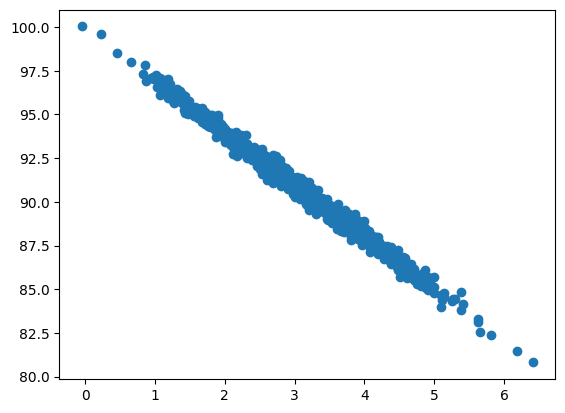

In [11]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

scatter(pageSpeeds, purchaseAmount)

In [12]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [13]:
r_value**2

0.9900978356712763

# predicted y = mx + c

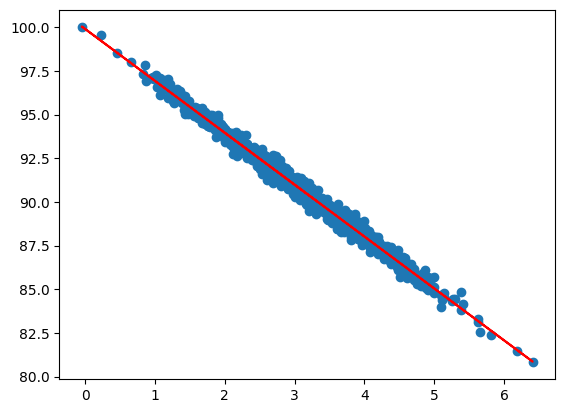

In [15]:
predicted_purchaseAmount = slope * pageSpeeds + intercept
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, predicted_purchaseAmount, c='r')
plt.show()

### Task# 2

a. Load advertising data from: https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/Advertising.csv

b. Fit a simple linear regression model on this data using TV and Sales.

c. Print evaluation metrics 'mean-squared error' and 'coefficient of determination'

In [5]:
advertising = pd.read_csv('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/Advertising.csv')
advertising.head()
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV(millionUSD)           149 non-null    float64
 1   SocialMedia(millionUSD)  149 non-null    float64
 2   newspaper(millionUSD)    149 non-null    float64
 3   sales(millionUSD)        149 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
X = advertising['TV(millionUSD)']
y = advertising['sales(millionUSD)']

In [6]:
reg = LinearRegression().fit(X.values.reshape(-1, 1),y)
print(reg.coef_)
print(reg.intercept_)

[0.04913531]
7.09494826381995


**sales = 7.095 + 0.0491TV**

In [7]:
y_pred = reg.predict(X.values.reshape(-1, 1))
y_pred

array([18.40098259,  9.28146946,  7.94007556, 14.5389474 , 15.97861191,
        7.52242544,  9.92022846, 13.00101226,  7.51751191, 16.91218276,
       10.34279211, 17.64429885,  8.26436859, 11.88564077, 17.12346459,
       16.69598741, 10.42632213, 20.92162388, 10.49511156, 14.3325791 ,
       17.82609949, 18.75967034,  7.74353433, 18.31253904, 10.15607794,
       20.01262069, 14.11638375, 18.89233567, 19.31981285, 10.56390099,
       21.48667992, 12.64232452, 11.87090018, 20.14528602, 11.79719722,
       21.37858224, 20.20916192, 10.76535576,  9.21268003, 18.29779844,
       17.04484809, 15.79189775, 21.52107464, 17.26104345,  8.32824449,
       15.69854066, 11.50238537, 18.88250861, 18.2584902 , 10.38210036,
       16.91218276, 12.02813317, 17.72782887, 16.06705547, 20.00279362,
       16.86796099,  7.45363601, 13.78717719, 17.45267115, 17.44775762,
        9.72368723, 19.93400419, 18.85302742, 12.14114438, 13.53658712,
       10.4852845 ,  8.64271046, 13.93949664, 18.75967034, 17.74

In [8]:
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

Mean squared error: 9.83
Coefficient of determination: 0.64


**TV advertisment expendicture explains about 64% variation in sales.**

## Multiple Linear Regression - Sklearn

Add more than one feature to the linear model


### Task# 3

a. Repeat Task#2 now with TV and social media.

b. Print evaluation metrics.

In [9]:
New_X = advertising[['TV(millionUSD)', 'SocialMedia(millionUSD)', 'newspaper(millionUSD)']]

In [10]:
reg2 = LinearRegression().fit(New_X, y)
print(reg2.coef_)
print(reg2.intercept_)

[ 0.0470328   0.17986735 -0.00133427]
3.0220576579537006


**sales = 3.022 + 0.047TV + 0.179SocialMedia -0.0013newspaper**

In [11]:
y_pred_New = reg2.predict(New_X)
y_pred_New

array([20.55095971, 12.1236285 , 11.99446805, 17.49799385, 13.39023423,
       12.12668592, 11.59473748, 12.18532307,  3.80292693, 12.85858021,
        7.14186714, 17.43147978, 10.3668537 ,  8.96514104, 18.47771198,
       20.72135688, 12.64191948, 23.30538301,  9.93959109, 14.22333458,
       18.20509721, 15.07361315,  6.43660153, 16.76444683,  8.19411269,
       15.99049896, 14.99634672, 17.28786355, 19.56766937,  9.16601278,
       21.83057105, 11.41025004,  7.82341892, 19.11091687,  7.76503757,
       17.42060831, 23.44663137, 15.35987882,  9.8047967 , 20.48383909,
       16.51507913, 17.30279689, 21.81081255, 14.22880552,  8.76739785,
       15.26248722,  8.97395327, 21.74503808, 16.48323437,  8.22389889,
       12.93063461,  9.46607426, 20.64758749, 19.84179719, 20.53653975,
       21.18227284,  8.36443072, 12.85922961, 21.80769098, 18.22554735,
        5.86949386, 22.91908016, 17.02852568, 13.1651922 , 16.84782021,
        7.93888658,  8.92539237, 12.16819411, 19.11932022, 21.07

In [12]:
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_New))
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred_New))

Mean squared error: 2.88
Coefficient of determination: 0.90


### Task# 4

a. Repeat Task#3 now with test/train split.

b. Print evaluation metrics.

c. Do you see any improvement in some evalution metrics?

In [13]:
X_train, X_test, y_train, y_test = train_test_split(New_X, y, test_size=0.2, random_state=42)

In [14]:
reg3 = LinearRegression().fit(X_train,y_train)
print(reg3.coef_)
print(reg3.intercept_)

[0.0469657  0.17422509 0.00349617]
2.9449199042116927


**sales = 2.94 + 0.047TV + 0.174SocialMedia + 0.0035newspaper**

In [17]:
y_pred_test = reg3.predict(X_test)
y_pred_test

array([10.1247947 ,  9.83054057,  6.72422283,  8.44072876,  4.58760753,
       11.41381618, 16.65999628,  9.3991294 , 18.92422503, 10.13183194,
       19.64584367, 10.40840168, 23.1286051 , 12.85577096, 14.09372404,
        8.32823586, 10.97453458, 20.87066095, 21.10288724, 16.05581183,
        9.19094348, 14.79793817, 14.80516532,  6.74373388, 21.83968078,
       10.1775526 , 15.17595445, 23.54268778, 15.19880791, 21.78277816])

In [18]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_test))

Mean squared error: 3.08
Coefficient of determination: 0.91


## Multiple Linear Regression - Statsmodel

### Task# 5

Fit OLS regression on advertising data and print a model summary.

In [19]:
X2 = advertising[['TV(millionUSD)', 'SocialMedia(millionUSD)', 'newspaper(millionUSD)']]
y2 = advertising['sales(millionUSD)']

In [20]:
X2 = sm.add_constant(X2)
model = sm.OLS(y2, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      sales(millionUSD)   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     413.6
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           7.69e-71
Time:                        12:35:06   Log-Likelihood:                -290.28
No. Observations:                 149   AIC:                             588.6
Df Residuals:                     145   BIC:                             600.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Task# 6 (Interaction Model)

a. Create a new variable by combining TV and Social Media variables.

b. Fit OLS regression on advertising data and print a model summary.

c. Do you observe any improvement in an evaluation metric?

In [21]:
X2 = advertising[['TV(millionUSD)', 'SocialMedia(millionUSD)', 'newspaper(millionUSD)']]
X2['TV_SocialMedia'] = X2['TV(millionUSD)'] * X2['SocialMedia(millionUSD)']
X2.head()

,TV(millionUSD),SocialMedia(millionUSD),newspaper(millionUSD),TV_SocialMedia
0,230.1,37.8,69.2,8697.78
1,44.5,39.3,45.1,1748.85
2,17.2,45.9,69.3,789.48
3,151.5,41.3,58.5,6256.95
4,180.8,10.8,58.4,1952.64


In [22]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [23]:
reg4 = LinearRegression().fit(X2_train,y2_train)
print(reg4.coef_)
print(reg4.intercept_)

[0.01862465 0.02209426 0.00497275 0.00110475]
6.766054501001869


**sales = 6.766 + 0.0186TV + 0.022SocialMedia + 0.00497newspaper + 0.0011TV_SocialMedia**

In [24]:
y_pred_test_new = reg4.predict(X2_test)
y_pred_test_new

array([10.27251335, 10.16601914,  8.34777227,  7.75236357,  7.46512824,
       11.61541237, 16.49596107,  9.95136775, 19.06223098, 10.46733567,
       19.73442901,  9.23542401, 25.64439384, 11.22402449, 14.0217541 ,
        7.95535334,  9.25375557, 22.42360235, 22.71526495, 12.83285747,
        9.88528214, 14.59031073, 14.76311098,  8.3055005 , 23.89309432,
       10.65108649, 13.47915321, 25.47658419, 15.03345108, 22.21869528])

In [25]:
print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, y_pred_test_new))
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y2_test, y_pred_test_new))

Mean squared error: 0.90
Coefficient of determination: 0.97


## Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data

### Task# 7

a. Fabicate some data that shows a polynomial relationship between page speed and amount purchase.

b. Fit a 4 degree polynomial line of fit on this data.

c. Report R-squared value.


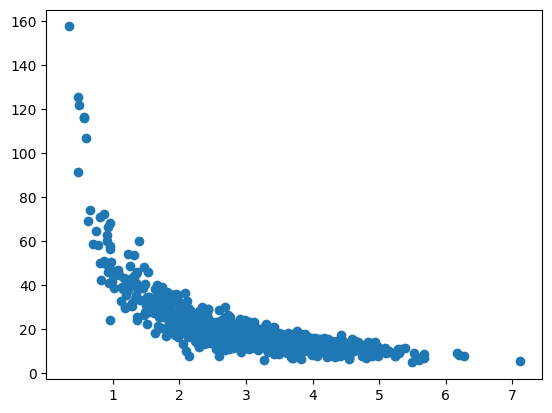

In [22]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

In [23]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

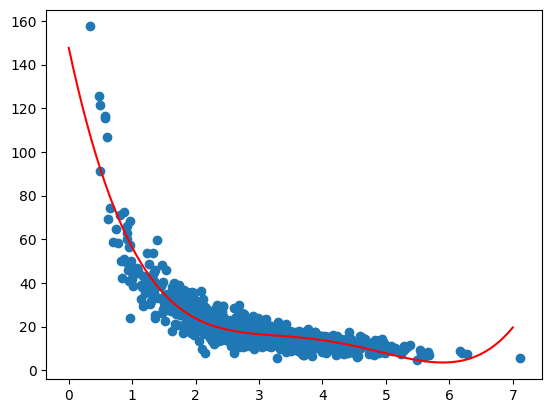

In [24]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

### Task# 8

a. Create polynomial features of advertising dataset that includes both interaction terms and sqaured features.

b. Fit OLS regression and print a model summary.

c. Is the model better off or worse off according to the evaluation metric?

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures(2,interaction_only=True)
X3 = advertising[['TV(millionUSD)', 'SocialMedia(millionUSD)', 'newspaper(millionUSD)']]
y = advertising['sales(millionUSD)']
X4 = poly.fit_transform(X3)
print(X4.shape)
print(poly.get_feature_names_out())
X4 = sm.add_constant(X4)
mod = sm.OLS(y, X4)
res = mod.fit()
print(res.summary())

(149, 7)
['1' 'TV(millionUSD)' 'SocialMedia(millionUSD)' 'newspaper(millionUSD)'
 'TV(millionUSD) SocialMedia(millionUSD)'
 'TV(millionUSD) newspaper(millionUSD)'
 'SocialMedia(millionUSD) newspaper(millionUSD)']
                            OLS Regression Results                            
Dep. Variable:      sales(millionUSD)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     700.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          8.07e-103
Time:                        15:09:33   Log-Likelihood:                -203.59
No. Observations:                 149   AIC:                             421.2
Df Residuals:                     142   BIC:                             442.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                       

**R-squared value of OLS model goes up from 0.894 to 0.967. This can mean two things:**

**1. The model's performance has actually improved by including interaction and polynomial terms.**

**2. The higher values of R-squared are possibly inflated due to multicolinearity**

## Feature Selection - FORWARD SELECTION & BACKWARD SELECTION

In [13]:
from sklearn.feature_selection import SequentialFeatureSelector

### Task# 9

a. Load Boston crime rate data from: https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/Boston.csv

b. Print its shape, columns, and info.

c. Drop s_no and medv.

d. Assign X and Y variables.

e. Fit OLS regression on the cleaned data.

In [9]:
crime = pd.read_csv('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/Boston.csv')
crime.head()

,s_no,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
X = crime.drop(columns=['s_no','medv'])
y = crime[['medv']]

In [11]:
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.23e-133
Time:                        15:16:28   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

### Task# 10

a. Perfrom forward selection for Boston crime data linear model.

b. What features are the most impactful?


In [14]:
ols_reg = LinearRegression()
sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_to_select=5)
sfs.fit(X, y)
print(sfs.get_feature_names_out())

['crim' 'chas' 'rm' 'ptratio' 'lstat']


### Task# 11

a. Perfrom backward selection for Boston crime data linear model.

b. What features are the most impactful?

In [15]:
ols_reg = LinearRegression()
sfs = SequentialFeatureSelector(ols_reg, direction='backward',n_features_to_select=5)
sfs.fit(X, y)
print(sfs.get_feature_names_out())

['zn' 'nox' 'dis' 'ptratio' 'lstat']


**Backward selection includes some features that forward selection skipped and vice versa**

**The common features selected by both methods are: ptratio, lstat. This means that these two features might be the most impactful in explaining crime rates in Boston**

# Gradient Descent DEMO

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
advertising = pd.read_csv('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/Advertising.csv')


In [28]:
# Feature matrix (X) and target vector (y)

X = advertising[['TV(millionUSD)', 'SocialMedia(millionUSD)']]
y = advertising['sales(millionUSD)']

In [29]:
# Standardizing the features for better performance of gradient descent
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [30]:
# Add a column of ones to X to account for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

In [31]:
# Initialize model parameters (weights)
theta = np.zeros(X.shape[1])

In [37]:
# Hyperparameters
learning_rate = 0.01
iterations = 200

In [38]:
# Gradient Descent Algorithm
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        # Prediction of y using the current model
        y_pred = X.dot(theta)

        # Calculate the cost (mean squared error)
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history[i] = cost

        # Gradient calculation
        gradient = (1 / m) * X.T.dot(y_pred - y)

        # Update the model parameters
        theta -= learning_rate * gradient

    return theta, cost_history

In [39]:
# Train the model
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

In [40]:
# Print the final parameters and plot the cost history
print(f"Final model parameters: {theta}")

Final model parameters: [14.17777034  4.02862347  2.64216353]


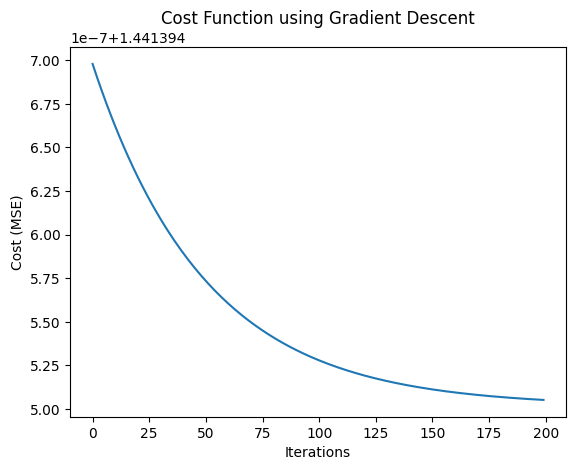

In [41]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function using Gradient Descent')
plt.show()